# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [7]:
import requests
import pandas as pd


BASE_URL = "http://api.worldbank.org/v2/country/{}/indicator/{}"


paises = ["ARG", "BRA"]
indicadores = ["NY.GDP.MKTP.CD", "SP.POP.TOTL"]


resultados = []
for pais in paises:
    for indicador in indicadores:
        url = BASE_URL.format(pais, indicador)
        params = {"format": "json", "per_page": 10}
        response = requests.get(url, params=params)

        if response.status_code == 200:
            data = response.json()
            if len(data) > 1:
                for entry in data[1]:
                    resultados.append({
                        "País": pais,
                        "Indicador": entry["indicator"]["value"],
                        "Año": entry["date"],
                        "Valor": entry["value"]
                    })
        else:
            print(f"Error al obtener datos para {pais} - {indicador}: {response.status_code}")


df = pd.DataFrame(resultados)

df

,País,Indicador,Año,Valor
0,ARG,GDP (current US$),2023,6.460753e+11
1,ARG,GDP (current US$),2022,6.327901e+11
2,ARG,GDP (current US$),2021,4.865641e+11
3,ARG,GDP (current US$),2020,3.857405e+11
4,ARG,GDP (current US$),2019,4.477547e+11
5,ARG,GDP (current US$),2018,5.248199e+11
6,ARG,GDP (current US$),2017,6.436284e+11
7,ARG,GDP (current US$),2016,5.575323e+11
8,ARG,GDP (current US$),2015,5.947493e+11
9,ARG,GDP (current US$),2014,5.263197e+11


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [8]:
print("\nEstadística descriptiva por indicador y país:")
summary = df.groupby(["País", "Indicador"]).describe()
summary


Estadística descriptiva por indicador y país:


Valor                                            \
                       count          mean           std           min   
País Indicador                                                           
ARG  GDP (current US$)  10.0  5.445974e+11  8.773222e+10  3.857405e+11   
     Population, total  10.0  4.457692e+07  8.730048e+05  4.302407e+07   
BRA  GDP (current US$)  10.0  1.918003e+12  2.716206e+11  1.476107e+12   
     Population, total  10.0  2.062903e+08  3.786682e+06  2.000851e+08   

                                                                                
                                 25%           50%           75%           max  
País Indicador                                                                  
ARG  GDP (current US$)  4.961280e+11  5.419260e+11  6.232799e+11  6.460753e+11  
     Population, total  4.399746e+07  4.481417e+07  4.528220e+07  4.553840e+07  
BRA  GDP (current US$)  1.797323e+12  1.895111e+12  2.035617e+12  2.456044e+12  
     Population, total  2.035894e+08  2.067814e+08  2.093279e+08  2.111407e+08

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

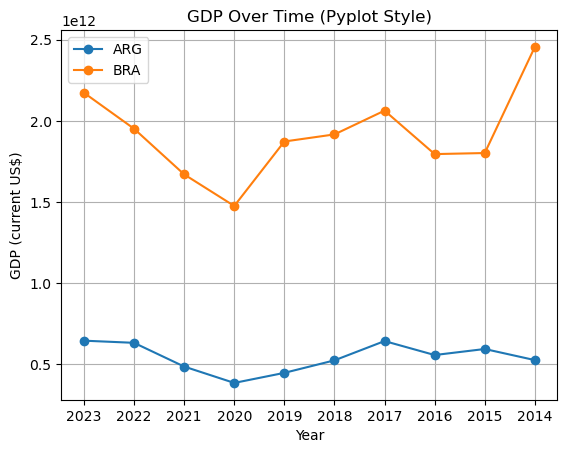

In [9]:
import matplotlib.pyplot as plt
for country in df["País"].unique():
    subset = df[(df["País"] == country) & (df["Indicador"] == "GDP (current US$)")]
    plt.plot(subset["Año"], subset["Valor"], marker='o', label=country)
plt.xlabel("Year") #xlabel
plt.ylabel("GDP (current US$)") #ylabel
plt.title("GDP Over Time (Pyplot Style)") #title
plt.legend()
plt.grid()
plt.show()

C:\Users\chlla\AppData\Local\Temp\ipykernel_14692\3963439618.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


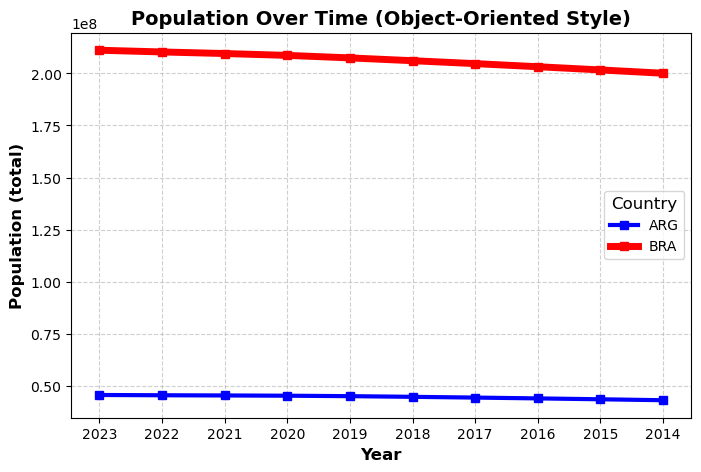

In [10]:
# Solve here using the object-oriented style
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlabel("Year")
ax.set_ylabel("Population (total)")
ax.set_title("Population Over Time (Object-Oriented Style)")
ax.legend()
ax.grid()

# Tip: take advantage of this programming style to make the figure look nicer
ax.set_xlabel("Year", fontsize=12, fontweight='bold') #xlabel
ax.set_ylabel("Population (total)", fontsize=12, fontweight='bold') #ylabel
ax.set_title("Population Over Time (Object-Oriented Style)", fontsize=14, fontweight='bold') #title
ax.grid(True, linestyle='--', alpha=0.6) #gridstyle

colors = {"ARG": "blue", "BRA": "red"} #dictionary for colors
thickness = {"ARG": 3, "BRA": 5} #dictionary for line thickness
for country in df["País"].unique():
    subset = df[(df["País"] == country) & (df["Indicador"] == "Population, total")]
    ax.plot(subset["Año"], subset["Valor"], 
            marker='s', linestyle='-', linewidth=thickness[country], markersize=6, 
            color=colors[country], label=country)
ax.legend(title="Country", fontsize=10, title_fontsize=12) #legend
plt.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [11]:
# Resolver acá
from bs4 import BeautifulSoup

# Define the base URL
BASE_URL = "https://www.lanacion.com.ar"

# Send a request to the website
response = requests.get(BASE_URL)
response.raise_for_status()  # Ensure we got a successful response

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Find all article links (Adjust the tag/class if needed)
articles = soup.find_all("a", href=True)

# Extract valid news links
news_links = []
for article in articles:
    link = article["href"]
    if link.startswith("/"):  # If link is relative, add domain
        link = BASE_URL + link
        news_links.append(link)

# Create DataFrame
df = pd.DataFrame(news_links, columns=["News Links"])
# Save to Excel file
df.to_excel("export.xlsx", index=False)
df
# here you get all links printed..some are not exactly links to the news directly, but some are just links for sections on the website
# 📊 Mostrar las primeras filas del DataFrame
print(df.head())


                            News Links
0   https://www.lanacion.com.ar/clima/
1         https://www.lanacion.com.ar/
2   https://www.lanacion.com.ar/autos/
3   https://www.lanacion.com.ar/salud/
4  https://www.lanacion.com.ar/juegos/
